In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn

# Some plotting config
seaborn.set(
    context="notebook",
    # style="ticks",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.5,
)
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
# plt.rcParams["xtick.top"] = True
# plt.rcParams["ytick.right"] = True
# plt.rcParams["xtick.bottom"] = True
# plt.rcParams["ytick.left"] = True
plt.rcParams["mathtext.fontset"] = "cm"

from tqdm.auto import tqdm, trange

from ssptools import evolve_mf_3 as emf3
from limepy import limepy

import numpy as np
import scipy as sp
import pandas as pd
import astropy.units as u
import astropy.constants as const

from binaryshift import BinaryShift
import binaryshift

from fitter import Observations
from fitter import Model

In [2]:
obs = Observations("NGC0104")

In [3]:
theta = [6.62, 0.88, 6.82, 1.33, 1.03, 0.37, 0.01, 3.49, 0.47, 1.18, 2.15, 0.13, 4.42]

In [4]:
model = Model(theta=theta, observations=obs)

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)


In [5]:
binshift = BinaryShift(mj=model.mj.value, Mj=model.Mj.value, MF=model._mf)

In [6]:
(
    mj,
    Mj,
) = binshift.shift_flat(0.05)
mj, Mj = binshift.rebin()

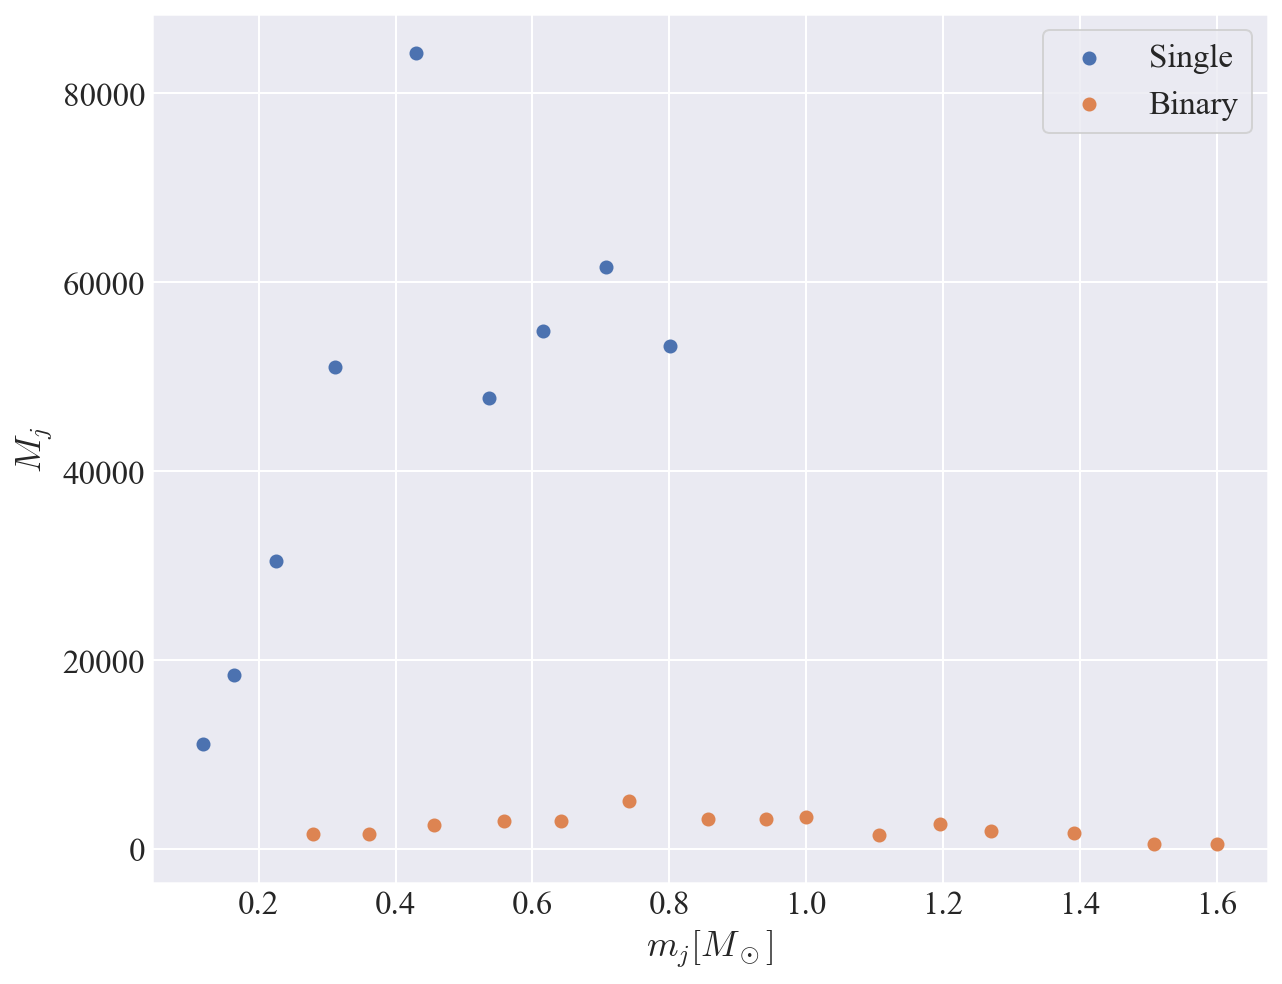

In [7]:
plt.figure()
plt.xlabel(r"$m_j [M_\odot]$")
plt.ylabel(r"$M_j$")
plt.scatter(mj[binshift.MS_mask], Mj[binshift.MS_mask], label="Single")
plt.scatter(mj[binshift.bin_mask], Mj[binshift.bin_mask], label="Binary")
plt.legend()

In [8]:
# make binshift from gcfit
def from_gcfit(model):

    # make binshift instance
    binshift = BinaryShift(mj=model.mj.value, Mj=model.Mj.value, MF=model._mf)

    # set some gcfit flag to True

    return binshift

In [9]:
# shoudl go through and update things to check if there's a gcfit flag, then use units properly if we do

In [10]:
dir(model)

['A',
 'BH_Mj',
 'BH_Nj',
 'BH_Sigmaj',
 'BH_mj',
 'BH_rhoj',
 'BHret',
 'F',
 'G',
 'K',
 'Kj',
 'Kr',
 'Krj',
 'Kt',
 'Ktj',
 'M',
 'Mj',
 'NS_Mj',
 'NS_Nj',
 'NS_Sigmaj',
 'NS_mj',
 'NS_rhoj',
 'Nj',
 'R',
 'Sigma',
 'Sigmaj',
 'U',
 'W0',
 'WD_Mj',
 'WD_Nj',
 'WD_Sigmaj',
 'WD_mj',
 'WD_rhoj',
 '_BH_bins',
 '_GS',
 '_MS',
 '_Mjtot',
 '_NS_bins',
 '_RS',
 '_WD_bins',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_units',
 '_beta',
 '_get_v2',
 '_init_mf',
 '_init_multi',
 '_init_rot',
 '_interpolator_set',
 '_logcheck',
 '_mBH_min',
 '_mWD_max',
 '_mf',
 '_odes',
 '_phil_rot',
 '_poisson',
 '_poisson_rot',
 '_project',
 '_remnant_bins',
 '_rhohat',
 '_rhoh

In [11]:
import astropy.units as u

In [12]:
d = 1 * u.day

In [13]:
type(d.unit)

astropy.units.core.Unit

In [14]:
a = 5

In [15]:
a <<= u.day

In [16]:
a

<Quantity 5. d>

In [17]:
model._mf.FeHe

-0.72

In [18]:
%timeit binaryshift.gcfit.get_isochrone(model)

7.82 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
df = binaryshift.gcfit.get_isochrone(model)

In [20]:
df

,,index,EEP,isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,...,WFC3_IR_F128N,WFC3_IR_F130N,WFC3_IR_F132N,WFC3_IR_F139M,WFC3_IR_F140W,WFC3_IR_F153M,WFC3_IR_F160W,WFC3_IR_F164N,WFC3_IR_F167N,phase
0,0,0,248,1.175000e+10,0.103780,0.103779,3.519028,5.301675,-2.819462,-0.75,...,9.809079,9.844381,9.825847,9.738119,9.716812,9.443673,9.433502,9.175398,9.204580,0.0
1,1,1,249,1.175000e+10,0.106515,0.106514,3.521017,5.293822,-2.794022,-0.75,...,9.752996,9.788653,9.770151,9.681389,9.660907,9.389151,9.379265,9.123575,9.153019,0.0
2,2,2,250,1.175000e+10,0.110198,0.110197,3.523698,5.283230,-2.759734,-0.75,...,9.677263,9.713383,9.694917,9.604848,9.585404,9.315424,9.305927,9.053417,9.083216,0.0
3,3,3,251,1.175000e+10,0.113766,0.113765,3.526294,5.272959,-2.726514,-0.75,...,9.603727,9.640283,9.621843,9.530587,9.512083,9.243740,9.234622,8.985119,9.015263,0.0
4,4,4,252,1.175000e+10,0.117616,0.117614,3.529095,5.261865,-2.690658,-0.75,...,9.524185,9.561203,9.542782,9.450315,9.432764,9.166108,9.157400,8.911074,8.941591,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1458,1458,1706,1.175000e+10,0.861750,0.538275,4.396678,7.795982,-1.085481,-0.75,...,10.681505,10.633183,10.551381,10.653230,10.656843,10.665003,10.675267,10.768950,10.697109,6.0
1459,1459,1459,1707,1.175000e+10,0.861800,0.538277,4.390285,7.798472,-1.113538,-0.75,...,10.709354,10.658525,10.568905,10.679550,10.683314,10.690596,10.700992,10.790590,10.722373,6.0
1460,1460,1460,1708,1.175000e+10,0.861857,0.538279,4.383888,7.800920,-1.141575,-0.75,...,10.736544,10.682343,10.584042,10.705401,10.709208,10.715622,10.726156,10.809423,10.746251,6.0
1461,1461,1461,1709,1.175000e+10,0.861919,0.538282,4.377485,7.803329,-1.169595,-0.75,...,10.763135,10.705000,10.597643,10.730816,10.734563,10.740132,10.750801,10.825954,10.769017,6.0
